In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense,Dropout

Using TensorFlow backend.


# Training and testing ML models: Autoencoder and Classifier

In [2]:
dataset = pd.read_csv("my_code/norm_dataset/dataset_complete_2")
input_data = dataset.drop(labels=['label'], axis=1)
labels = dataset.loc[:,'label']


In [3]:
del input_data["Unnamed: 0"]
input_dim = input_data.shape[1]

In [27]:
input_data

,avg:boottime,var:boottime,avg:bytes_in,var:bytes_in,avg:bytes_out,var:bytes_out,avg:core_freq_avg,var:core_freq_avg,avg:core_freq_max,var:core_freq_max,...,avg:SysBrd_3_3V,var:SysBrd_3_3V,avg:SysBrd_5V,var:SysBrd_5V,avg:Sys_Power,var:Sys_Power,avg:Sys_Utilization,var:Sys_Utilization,avg:System_Air_Flow,var:System_Air_Flow
0,1.062039e-05,0.0,0.000555,2.283939e-07,0.000335,1.388315e-07,0.278500,0.011063,1.000000,0.000000,...,4.000000e-01,3.420313e-27,0.25,6.213460e-27,0.338384,0.000000,0.020202,0.000000,0.369942,0.0225
1,1.062039e-05,0.0,0.000071,4.517481e-10,0.000033,2.637226e-11,1.000000,0.000000,1.000000,0.000000,...,4.000000e-01,0.000000e+00,0.25,6.213460e-27,0.616162,0.000000,0.989899,0.000000,0.520231,0.0000
2,1.062039e-05,0.0,0.000077,6.850317e-13,0.000039,1.025377e-10,0.932278,0.019878,0.949528,0.014804,...,4.000000e-01,0.000000e+00,0.25,6.213460e-27,0.883838,0.007134,0.810101,0.013332,0.635838,0.0000
3,1.062039e-05,0.0,0.000798,3.753747e-08,0.000196,2.935972e-08,0.562667,0.085836,0.942333,0.008965,...,4.000000e-01,0.000000e+00,0.25,6.213460e-27,0.262626,0.000000,0.036364,0.000612,0.404624,0.0000
4,1.062039e-05,0.0,0.000624,6.728702e-07,0.000368,3.013188e-07,1.000000,0.000000,1.000000,0.000000,...,4.000000e-01,0.000000e+00,0.25,6.213460e-27,0.767677,0.000000,0.808081,0.000000,0.549133,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66353,3.267814e-07,0.0,0.000069,7.872900e-10,0.000161,1.104144e-09,0.370972,0.052235,0.958556,0.009768,...,7.105427e-15,3.420313e-27,0.50,0.000000e+00,0.540404,0.118906,0.393939,0.000000,0.306358,0.0025
66354,3.267814e-07,0.0,0.000816,2.449614e-07,0.009287,6.291883e-05,1.000000,0.000000,1.000000,0.000000,...,7.105427e-15,3.420313e-27,0.50,0.000000e+00,0.580808,0.003171,0.941414,0.000068,0.473988,0.0150
66355,3.267814e-07,0.0,0.000285,3.200907e-08,0.000067,1.103904e-09,0.252778,0.000594,0.889833,0.002653,...,7.105427e-15,3.420313e-27,0.50,0.000000e+00,0.494949,0.000793,0.133333,0.002449,0.491329,0.0000
66356,3.267814e-07,0.0,0.006751,2.334798e-04,0.000276,2.294753e-07,0.748000,0.068344,0.991861,0.001238,...,7.105427e-15,3.420313e-27,0.75,6.213460e-27,0.363636,0.000000,0.060606,0.000000,0.635838,0.0000


In [28]:
autoencoder = Sequential()
autoencoder.add(Dense(100, activation='relu', input_dim=input_dim, name='encoder_1'))
autoencoder.add(Dense(80, activation='relu', name="encoder_2"))
autoencoder.add(Dense(60, activation='relu', name="encoder_3"))
autoencoder.add(Dense(40, activation='relu', name="encoder_4"))
autoencoder.add(Dense(20, activation='relu', name='code'))
autoencoder.add(Dense(40, activation='relu', name="decoder_1"))
autoencoder.add(Dense(60, activation='relu', name="decoder_2"))
autoencoder.add(Dense(80, activation='relu', name="decoder_3"))
autoencoder.add(Dense(100, activation='relu', name="decoder_4"))
autoencoder.add(Dense(input_dim, activation='sigmoid', name='output'))
autoencoder.compile(optimizer='adam', loss="mean_squared_error")
print(autoencoder.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (Dense)            (None, 100)               12500     
_________________________________________________________________
encoder_2 (Dense)            (None, 80)                8080      
_________________________________________________________________
encoder_3 (Dense)            (None, 60)                4860      
_________________________________________________________________
encoder_4 (Dense)            (None, 40)                2440      
_________________________________________________________________
code (Dense)                 (None, 20)                820       
_________________________________________________________________
decoder_1 (Dense)            (None, 40)                840       
_________________________________________________________________
decoder_2 (Dense)            (None, 60)               

In [29]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (Dense)            (None, 100)               12500     
_________________________________________________________________
encoder_2 (Dense)            (None, 80)                8080      
_________________________________________________________________
encoder_3 (Dense)            (None, 60)                4860      
_________________________________________________________________
encoder_4 (Dense)            (None, 40)                2440      
_________________________________________________________________
code (Dense)                 (None, 20)                820       
_________________________________________________________________
decoder_1 (Dense)            (None, 40)                840       
_________________________________________________________________
decoder_2 (Dense)            (None, 60)               

In [30]:
history = autoencoder.fit(x=input_data, y=input_data, epochs=150, validation_split=0.20, batch_size=75,shuffle=True)

Train on 53086 samples, validate on 13272 samples
Epoch 1/150
53086/53086 [==============================] - 2s 37us/step - loss: 0.0137 - val_loss: 0.0065
Epoch 2/150
53086/53086 [==============================] - 2s 28us/step - loss: 0.0039 - val_loss: 0.0048
Epoch 3/150
53086/53086 [==============================] - 1s 28us/step - loss: 0.0029 - val_loss: 0.0037
Epoch 4/150
53086/53086 [==============================] - 1s 26us/step - loss: 0.0025 - val_loss: 0.0033
Epoch 5/150
53086/53086 [==============================] - 1s 26us/step - loss: 0.0022 - val_loss: 0.0030
Epoch 6/150
53086/53086 [==============================] - 1s 26us/step - loss: 0.0020 - val_loss: 0.0026
Epoch 7/150
53086/53086 [==============================] - 1s 26us/step - loss: 0.0019 - val_loss: 0.0027
Epoch 8/150
53086/53086 [==============================] - 2s 30us/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/150
53086/53086 [==============================] - 1s 27us/step - loss: 0.0016 - val_loss: 0.0

53086/53086 [==============================] - 2s 31us/step - loss: 4.4853e-04 - val_loss: 0.0015
Epoch 149/150
53086/53086 [==============================] - 2s 30us/step - loss: 4.4893e-04 - val_loss: 0.0017
Epoch 150/150
53086/53086 [==============================] - 2s 29us/step - loss: 4.5144e-04 - val_loss: 0.0015


In [8]:
# Plot training & validation loss values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("./img/loss_autoencoder_history.png")
plt.show()



NameError: name 'history' is not defined

In [32]:
loss = autoencoder.evaluate(input_data, input_data)
print(loss)

66358/66358 [==============================] - 1s 12us/step
0.0006683709033869009


In [33]:
autoencoder.save('./models/my_models/autoencoder_model03.h5')

In [4]:
autoencoder = load_model('./models/my_models/autoencoder_model03.h5')

In [5]:
#classifier model
encoder = Model(inputs=autoencoder.get_layer("encoder_1").input, outputs=autoencoder.get_layer("code").output)
classifier = Sequential()
classifier.add(encoder)
classifier.add(Dense(20, activation='relu', name="hidden"))
classifier.add(Dense(1,activation="sigmoid", name="output"))
classifier.layers[0].name="encoder"
classifier.layers[0].trainable=False
classifier.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              (None, 20)                28700     
_________________________________________________________________
hidden (Dense)               (None, 20)                420       
_________________________________________________________________
output (Dense)               (None, 1)                 21        
Total params: 29,141
Trainable params: 441
Non-trainable params: 28,700
_________________________________________________________________
None


In [6]:
history_class = classifier.fit(x=input_data, y=labels, epochs=150, validation_split=0.10, batch_size=75,shuffle=True)

Train on 59722 samples, validate on 6636 samples
Epoch 1/150
59722/59722 [==============================] - 1s 17us/step - loss: 0.0974 - accuracy: 0.9743 - val_loss: 0.0742 - val_accuracy: 0.9837
Epoch 2/150
59722/59722 [==============================] - 1s 17us/step - loss: 0.0653 - accuracy: 0.9806 - val_loss: 0.0700 - val_accuracy: 0.9840
Epoch 3/150
59722/59722 [==============================] - 1s 20us/step - loss: 0.0611 - accuracy: 0.9834 - val_loss: 0.0654 - val_accuracy: 0.9851
Epoch 4/150
59722/59722 [==============================] - 1s 15us/step - loss: 0.0585 - accuracy: 0.9850 - val_loss: 0.0648 - val_accuracy: 0.9849
Epoch 5/150
59722/59722 [==============================] - 1s 15us/step - loss: 0.0573 - accuracy: 0.9854 - val_loss: 0.0623 - val_accuracy: 0.9860
Epoch 6/150
59722/59722 [==============================] - 1s 16us/step - loss: 0.0563 - accuracy: 0.9857 - val_loss: 0.0604 - val_accuracy: 0.9848
Epoch 7/150
59722/59722 [==============================] - 1s 1

Epoch 56/150
59722/59722 [==============================] - 1s 12us/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0668 - val_accuracy: 0.9798
Epoch 57/150
59722/59722 [==============================] - 1s 13us/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0594 - val_accuracy: 0.9840
Epoch 58/150
59722/59722 [==============================] - 1s 13us/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0634 - val_accuracy: 0.9798
Epoch 59/150
59722/59722 [==============================] - 1s 13us/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0575 - val_accuracy: 0.9842
Epoch 60/150
59722/59722 [==============================] - 1s 13us/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0584 - val_accuracy: 0.9854
Epoch 61/150
59722/59722 [==============================] - 1s 17us/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0588 - val_accuracy: 0.9848
Epoch 62/150
59722/59722 [==============================] - 1s 16us/step - loss: 0.0381 - accuracy: 0.9879

Epoch 111/150
59722/59722 [==============================] - 1s 14us/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0586 - val_accuracy: 0.9861
Epoch 112/150
59722/59722 [==============================] - 1s 19us/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0621 - val_accuracy: 0.9834
Epoch 113/150
59722/59722 [==============================] - 1s 16us/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0593 - val_accuracy: 0.9852
Epoch 114/150
59722/59722 [==============================] - 1s 21us/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0569 - val_accuracy: 0.9861
Epoch 115/150
59722/59722 [==============================] - 1s 20us/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0582 - val_accuracy: 0.9864
Epoch 116/150
59722/59722 [==============================] - 1s 20us/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0579 - val_accuracy: 0.9864
Epoch 117/150
59722/59722 [==============================] - 1s 13us/step - loss: 0.0352 - accuracy:

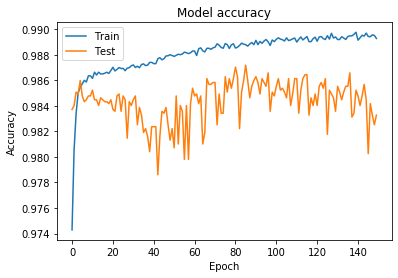

In [9]:
# Plot training & validation accuracy values
plt.plot(history_class.history['accuracy'])
plt.plot(history_class.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("./img/acc_history.png")
plt.show()

In [10]:
classifier.save('./models/my_models/classifier_model04.h5')

In [38]:
def assign_class(predicted_probabilities, threshold=0.2):
    classes = []
    for i in range(len(predicted_probabilities)):
        if(predicted_probabilities[i] >= threshold):
            classes.append(1)
        else:
            classes.append(0)
    return np.asarray(classes)

In [39]:
predict_prob = classifier.predict(X_test)

NameError: name 'X_test' is not defined

In [71]:
classes = assign_class(predict_prob)

In [72]:
from sklearn.metrics import accuracy_score
print("Accuracy :"+str(accuracy_score(y_test,classes)*100))
from sklearn.metrics import f1_score
print("f1Score: "+str(f1_score(y_test,classes,average='weighted')))
from sklearn.metrics import recall_score
print("recall: "+str(recall_score(y_test,classes)))

Accuracy :99.2199894235854
f1Score: 0.9921134147105986
recall: 0.8316831683168316


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classes)

array([[7337,   25],
       [  34,  168]])

# Model with only common features

In [6]:
dataset = pd.read_csv("my_code/norm_dataset/dataset_complete_2")
input_data = dataset.drop(labels=['label'], axis=1)
labels = dataset.loc[:,'label']


In [7]:
input_data = input_data.drop("Unnamed: 0",axis=1)
input_dim = input_data.shape[1]

In [8]:
autoencoder = Sequential()
autoencoder.add(Dense(100, activation='relu', input_dim=input_dim, name='encoder_1'))
autoencoder.add(Dense(80, activation='relu', name="encoder_2"))
autoencoder.add(Dense(60, activation='relu', name="encoder_3"))
autoencoder.add(Dense(40, activation='relu', name="encoder_4"))
autoencoder.add(Dense(20, activation='relu', name='code'))
autoencoder.add(Dense(40, activation='relu', name="decoder_1"))
autoencoder.add(Dense(60, activation='relu', name="decoder_2"))
autoencoder.add(Dense(80, activation='relu', name="decoder_3"))
autoencoder.add(Dense(100, activation='relu', name="decoder_4"))
autoencoder.add(Dense(input_dim, activation='sigmoid', name='output'))
autoencoder.compile(optimizer='adam', loss="mean_squared_error")
print(autoencoder.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (Dense)            (None, 100)               12500     
_________________________________________________________________
encoder_2 (Dense)            (None, 80)                8080      
_________________________________________________________________
encoder_3 (Dense)            (None, 60)                4860      
_________________________________________________________________
encoder_4 (Dense)            (None, 40)                2440      
_________________________________________________________________
code (Dense)                 (None, 20)                820       
_________________________________________________________________
decoder_1 (Dense)            (None, 40)                840       
_________________________________________________________________
deco

In [9]:
history = autoencoder.fit(x=input_data, y=input_data, epochs=150, validation_split=0.20, batch_size=75,shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 21174 samples, validate on 5294 samples
Epoch 1/150
21174/21174 [==============================] - 2s 86us/step - loss: 0.0278 - val_loss: 0.0222
Epoch 2/150
21174/21174 [==============================] - 1s 32us/step - loss: 0.0082 - val_loss: 0.0209
Epoch 3/150
21174/21174 [==============================] - 1s 34us/step - loss: 0.0056 - val_loss: 0.0202
Epoch 4/150
21174/21174 [==============================] - 1s 35us/step - loss: 0.0043 - val_loss: 0.0200
Epoch 5/150
21174/21174 [==============================] - 1s 32us/step - loss: 0.0035 - val_loss: 0.0201
Epoch 6/150
21174/21174 [==============================] - 1s 35us/step - loss: 0.0030 - val_loss: 0.0207
Epoch 7/150
21174/21174 [==============================] - 1s 37us/step - loss: 0.0027 - val_loss: 0.0205
Epoch 8/150
21174/21174 [==============================] - 1s 40us/step - loss: 0.0025 - val_loss: 0.0186
Epoch 9/150
21174/21174 [==============================

21174/21174 [==============================] - 1s 40us/step - loss: 5.9110e-04 - val_loss: 0.0159
Epoch 147/150
21174/21174 [==============================] - 1s 36us/step - loss: 5.8738e-04 - val_loss: 0.0160
Epoch 148/150
21174/21174 [==============================] - 1s 34us/step - loss: 5.8742e-04 - val_loss: 0.0160
Epoch 149/150
21174/21174 [==============================] - 1s 36us/step - loss: 5.9835e-04 - val_loss: 0.0158
Epoch 150/150
21174/21174 [==============================] - 1s 36us/step - loss: 5.9711e-04 - val_loss: 0.0156


In [10]:
loss = autoencoder.evaluate(input_data, input_data)
print(loss)

26468/26468 [==============================] - 1s 21us/step
0.0036140324523115386


In [11]:
#classifier model
encoder = Model(inputs=autoencoder.get_layer("encoder_1").input, outputs=autoencoder.get_layer("code").output)
classifier = Sequential()
classifier.add(encoder)
classifier.add(Dense(20, activation='relu', name="hidden"))
classifier.add(Dense(10, activation='relu', name="hidden2"))
classifier.add(Dense(5, activation='relu', name="hidden3"))
classifier.add(Dense(1,activation="sigmoid", name="output"))
classifier.layers[0].name="encoder"
classifier.layers[0].trainable=False
classifier.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              (None, 20)                28700     
_________________________________________________________________
hidden (Dense)               (None, 20)                420       
_________________________________________________________________
hidden2 (Dense)              (None, 10)                210       
_________________________________________________________________
hidden3 (Dense)              (None, 5)                 55        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 29,391
Trainable params: 691
Non-trainable params: 28,700
_________________________________________________________________
None


In [19]:
history_class = classifier.fit(x=input_data, y=labels, epochs=150, validation_split=0.10, batch_size=75,shuffle=True)

Train on 68262 samples, validate on 7585 samples
Epoch 1/150
68262/68262 [==============================] - 1s 16us/step - loss: 0.0242 - accuracy: 0.9916 - val_loss: 0.0858 - val_accuracy: 0.9735
Epoch 2/150
68262/68262 [==============================] - 1s 21us/step - loss: 0.0241 - accuracy: 0.9918 - val_loss: 0.0812 - val_accuracy: 0.9788
Epoch 3/150
68262/68262 [==============================] - 1s 21us/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0964 - val_accuracy: 0.9699
Epoch 4/150
68262/68262 [==============================] - 2s 22us/step - loss: 0.0245 - accuracy: 0.9916 - val_loss: 0.0818 - val_accuracy: 0.9800
Epoch 5/150
68262/68262 [==============================] - 1s 18us/step - loss: 0.0243 - accuracy: 0.9917 - val_loss: 0.0832 - val_accuracy: 0.9784
Epoch 6/150
68262/68262 [==============================] - 1s 17us/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0928 - val_accuracy: 0.9702
Epoch 7/150
68262/68262 [==============================] - 1s 2

Epoch 56/150
68262/68262 [==============================] - 1s 17us/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0857 - val_accuracy: 0.9751
Epoch 57/150
68262/68262 [==============================] - 1s 17us/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0850 - val_accuracy: 0.9738
Epoch 58/150
68262/68262 [==============================] - 1s 17us/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0866 - val_accuracy: 0.9846
Epoch 59/150
68262/68262 [==============================] - 1s 17us/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0886 - val_accuracy: 0.9717
Epoch 60/150
68262/68262 [==============================] - 1s 17us/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0930 - val_accuracy: 0.9710
Epoch 61/150
68262/68262 [==============================] - 1s 18us/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0837 - val_accuracy: 0.9781
Epoch 62/150
68262/68262 [==============================] - 1s 18us/step - loss: 0.0227 - accuracy: 0.9924

Epoch 111/150
68262/68262 [==============================] - 1s 18us/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0889 - val_accuracy: 0.9837
Epoch 112/150
68262/68262 [==============================] - 1s 18us/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0913 - val_accuracy: 0.9715
Epoch 113/150
68262/68262 [==============================] - 1s 18us/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0903 - val_accuracy: 0.9732
Epoch 114/150
68262/68262 [==============================] - 1s 17us/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0867 - val_accuracy: 0.9727
Epoch 115/150
68262/68262 [==============================] - 1s 20us/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0895 - val_accuracy: 0.9730
Epoch 116/150
68262/68262 [==============================] - 1s 21us/step - loss: 0.0217 - accuracy: 0.9924 - val_loss: 0.0934 - val_accuracy: 0.9742
Epoch 117/150
68262/68262 [==============================] - 1s 21us/step - loss: 0.0216 - accuracy:

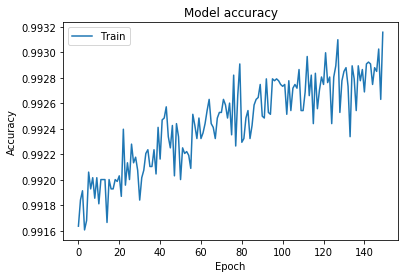

In [22]:
# Plot training & validation accuracy values
plt.plot(history_class.history['accuracy'])
#plt.plot(history_class.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
classifier.save('./models/my_models/classifier_model03.h5')